In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
import sqlite3

conn = sqlite3.connect('Cantones.db')

provincias_cercanas = [
    18, 6, 5, 13, 12, 17, 23
]

#Load the entire dataset
df_hogar = pd.read_csv(
    '/Users/dicordova/Proyecto-FDS/data/hogar_cant.csv', sep=';'
)

# #Filter the dataset to only include the provinces of interest
df_hogar = df_hogar[df_hogar['I01'].isin(provincias_cercanas)]

#Display basic information
print(df_hogar.info())
print(df_hogar.describe())
print(df_hogar.shape)

/var/folders/3l/l6t22czn1d11mnzrp1kdh_340000gn/T/ipykernel_18293/571443484.py:10: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_hogar = pd.read_csv(


<class 'pandas.core.frame.DataFrame'>
Index: 2381224 entries, 434069 to 5087417
Data columns (total 44 columns):
 #   Column    Dtype  
---  ------    -----  
 0   I01       int64  
 1   I02       int64  
 2   I10       float64
 3   INH       int64  
 4   H01       float64
 5   H02       float64
 6   H03       float64
 7   H04       float64
 8   H05       float64
 9   H06       float64
 10  H0701     float64
 11  H0702     float64
 12  H0703     float64
 13  H0801     float64
 14  H0801N    float64
 15  H0802     float64
 16  H0802N    float64
 17  H09       float64
 18  H1001     float64
 19  H1002     float64
 20  H1003     float64
 21  H1004     float64
 22  H1005     float64
 23  H1006     float64
 24  H1007     float64
 25  H1008     float64
 26  H1009     float64
 27  H1010     float64
 28  H1011     float64
 29  H1012     float64
 30  H11       float64
 31  H1101     float64
 32  H12       float64
 33  H1201     float64
 34  H1301     int64  
 35  H1302     int64  
 36  H1303   

De entrada, podemos ver que hay menos datos en este dataset que en el de vivienda. 

In [3]:
dtype_counts = df_hogar.dtypes.value_counts()
print(dtype_counts)

float64    33
int64      10
object      1
Name: count, dtype: int64


In [4]:
#We count nulls per column
missing_values_df_hogar = df_hogar.isnull().mean() * 100
missing_values_df_hogar = missing_values_df_hogar.sort_values(ascending=False).reset_index()
missing_values_df_hogar.columns = ['Missing Values', 'Percentage']
print(missing_values_df_hogar)

   Missing Values  Percentage
0           H1201   98.305241
1           H1101   95.596046
2          H0802N   73.841940
3          H0801N   46.035904
4           H1008    0.072484
5           H1003    0.072484
6           H1004    0.072484
7           H1006    0.072484
8           H1007    0.072484
9           H1005    0.072484
10          H1009    0.072484
11          H1002    0.072484
12          H1011    0.072484
13          H1012    0.072484
14            H11    0.072484
15            H12    0.072484
16          H1010    0.072484
17          H1001    0.072484
18            H05    0.072484
19           H01R    0.072484
20          H0802    0.072484
21          H0801    0.072484
22          H0703    0.072484
23          H0702    0.072484
24          H0701    0.072484
25            H06    0.072484
26            H09    0.072484
27            H04    0.072484
28            H03    0.072484
29            H02    0.072484
30            H01    0.072484
31         CANTON    0.000000
32        

In [5]:
#As with the vivienda dataset, we rename the columns to make them more readable
columns_renaming = {
    'I01': 'provincia',
    'I02': 'canton_id',
    'I10': 'nro_vivienda',
    'INH': 'nro_hogar',
    'H01': 'nro_dormitorios',
    'H02': 'espacio_cocina',
    'H03': 'tiene_inodoro',
    'H04': 'tiene_ducha',
    'H05': 'combustible_cocina',
    'H06': 'fuente_agua_bebida',
    'H0701': 'separa_basura_organica',
    'H0702': 'separa_basura_animales',
    'H0703': 'separa_basura_reciclaje',
    'H0801': 'tiene_perros',
    'H0801N': 'nro_perros',
    'H0802': 'tiene_gatos',
    'H0802N': 'nro_gatos',
    'H09': 'tenencia_vivienda',
    'H1001': 'tiene_telefono_fijo',
    'H1002': 'tiene_celular',
    'H1003': 'tiene_tv_pagada',
    'H1004': 'tiene_internet',
    'H1005': 'tiene_computadora',
    'H1006': 'tiene_refrigeradora',
    'H1007': 'tiene_lavadora',
    'H1008': 'tiene_secadora',
    'H1009': 'tiene_microondas',
    'H1010': 'tiene_extractora_olores',
    'H1011': 'tiene_auto',
    'H1012': 'tiene_moto',
    'H11': 'fallecidos_ultimos_3_anios',
    'H1101': 'nro_fallecidos',
    'H12': 'emigrantes_desde_2010',
    'H1201': 'nro_emigrantes',
    'H1301': 'total_hombres',
    'H1302': 'total_mujeres',
    'H1303': 'total_personas',
    'H15': 'persona_no_mencionada',
    'AUR': 'zona',
    'CANTON': 'canton',
    'ID_VIV': 'id_vivienda',
    'ID_HOG': 'id_hogar',
    'H01R': 'nro_cuartos_con_sala_comedor',
    'IMP_VOPA': 'registro_imputado_hogar'
}

df_hogar_renamed = df_hogar.rename(columns=columns_renaming)
df_hogar_renamed.info()
df_hogar_renamed.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
Index: 2381224 entries, 434069 to 5087417
Data columns (total 44 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   provincia                     int64  
 1   canton_id                     int64  
 2   nro_vivienda                  float64
 3   nro_hogar                     int64  
 4   nro_dormitorios               float64
 5   espacio_cocina                float64
 6   tiene_inodoro                 float64
 7   tiene_ducha                   float64
 8   combustible_cocina            float64
 9   fuente_agua_bebida            float64
 10  separa_basura_organica        float64
 11  separa_basura_animales        float64
 12  separa_basura_reciclaje       float64
 13  tiene_perros                  float64
 14  nro_perros                    float64
 15  tiene_gatos                   float64
 16  nro_gatos                     float64
 17  tenencia_vivienda             float64
 18  tiene_telefono_fijo   

nro_emigrantes                  2340868
nro_fallecidos                  2276356
nro_gatos                       1758342
nro_perros                      1096218
tiene_secadora                     1726
tiene_tv_pagada                    1726
tiene_internet                     1726
tiene_refrigeradora                1726
tiene_lavadora                     1726
tiene_computadora                  1726
tiene_microondas                   1726
tiene_celular                      1726
tiene_auto                         1726
tiene_moto                         1726
fallecidos_ultimos_3_anios         1726
emigrantes_desde_2010              1726
tiene_extractora_olores            1726
tiene_telefono_fijo                1726
combustible_cocina                 1726
nro_cuartos_con_sala_comedor       1726
tiene_gatos                        1726
tiene_perros                       1726
separa_basura_reciclaje            1726
separa_basura_animales             1726
separa_basura_organica             1726


In [6]:
df_hogar_renamed.duplicated().sum()

np.int64(0)

In [7]:
#We count nulls per column
missing_values_df_hogar = df_hogar_renamed.isnull().mean() * 100
missing_values_df_hogar = missing_values_df_hogar.sort_values(ascending=False).reset_index()
missing_values_df_hogar.columns = ['Missing Values', 'Percentage']
print(missing_values_df_hogar)

                  Missing Values  Percentage
0                 nro_emigrantes   98.305241
1                 nro_fallecidos   95.596046
2                      nro_gatos   73.841940
3                     nro_perros   46.035904
4                 tiene_secadora    0.072484
5                tiene_tv_pagada    0.072484
6                 tiene_internet    0.072484
7            tiene_refrigeradora    0.072484
8                 tiene_lavadora    0.072484
9              tiene_computadora    0.072484
10              tiene_microondas    0.072484
11                 tiene_celular    0.072484
12                    tiene_auto    0.072484
13                    tiene_moto    0.072484
14    fallecidos_ultimos_3_anios    0.072484
15         emigrantes_desde_2010    0.072484
16       tiene_extractora_olores    0.072484
17           tiene_telefono_fijo    0.072484
18            combustible_cocina    0.072484
19  nro_cuartos_con_sala_comedor    0.072484
20                   tiene_gatos    0.072484
21        

In [8]:
null_by_province = (df_hogar_renamed.groupby('provincia')
                    .apply(lambda x: x.isnull().mean()*100)
                    .round(2))
                
print(null_by_province)


           provincia  canton_id  nro_vivienda  nro_hogar  nro_dormitorios  \
provincia                                                                   
5                0.0        0.0           0.0        0.0             0.07   
6                0.0        0.0           0.0        0.0             0.09   
12               0.0        0.0           0.0        0.0             0.05   
13               0.0        0.0           0.0        0.0             0.07   
17               0.0        0.0           0.0        0.0             0.07   
18               0.0        0.0           0.0        0.0             0.10   
23               0.0        0.0           0.0        0.0             0.08   

           espacio_cocina  tiene_inodoro  tiene_ducha  combustible_cocina  \
provincia                                                                   
5                    0.07           0.07         0.07                0.07   
6                    0.09           0.09         0.09                0.09  

/var/folders/3l/l6t22czn1d11mnzrp1kdh_340000gn/T/ipykernel_18293/2701747535.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isnull().mean()*100)


Podemos ver que los valores nulos en cada columna son iguales o menores que el 10% del total de la muestra. Sin embargo, también son mucho menores a los valores faltantes en el dataset de vivienda. Por lo tanto, se sugiere unir ambos datasets para evaluar los null en un dataframe conjunto. 
 

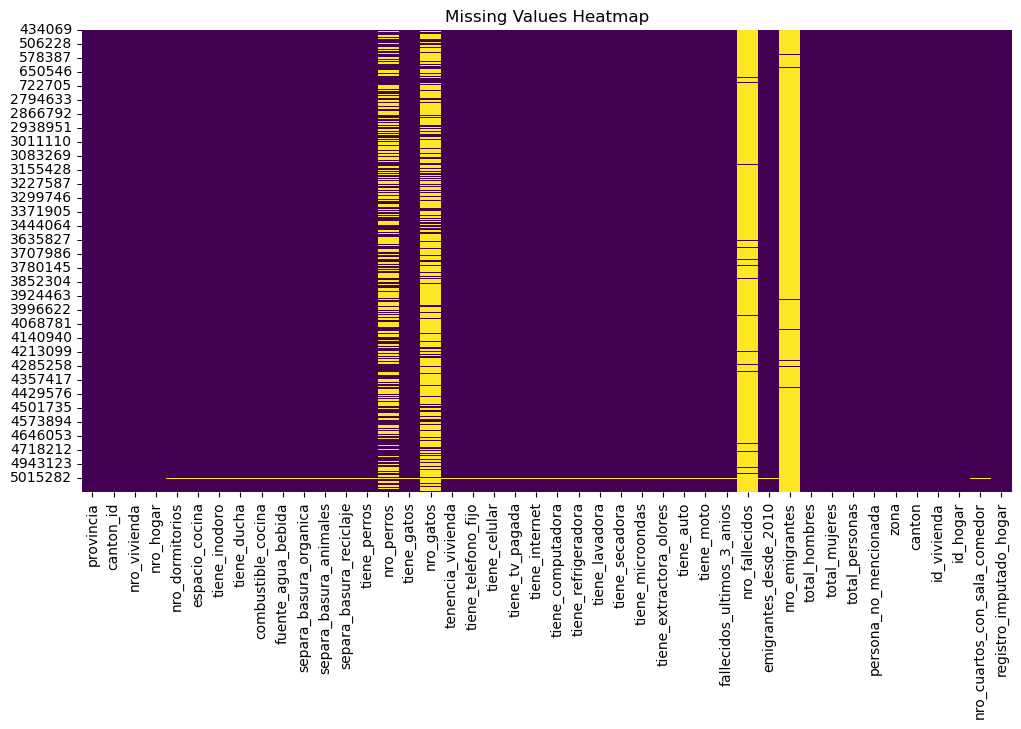

In [9]:
import seaborn as sns
# We create a heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df_hogar_renamed.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Además de lo revelado por el análisis, sabemos que variables nro_dormitorios, zona, cantón, identificador de la vivienda, total de fallecidos, total de emigrantes, total de personas, déficcit habitacional y registro imputado son variables derivadas. 
El INEC recomienda mantener las variables derivadas para los análisis (Buscar fuente)

- There are no duplicates in the dataset
- The nulls in some columns have consistent numbers, which will need further exploration
- There are integer values that will have to be transformed to numeric
- There is a probability that the missing values correspond to the viviendas colectivas, which seem to have been excluded from this part of the census. 

In [10]:
df_hogar_renamed[['total_personas', 'total_mujeres', 'total_hombres']].describe()

,total_personas,total_mujeres,total_hombres
count,2.381224e+06,2.381224e+06,2.381224e+06
mean,3.183073e+00,1.636246e+00,1.546826e+00
std,3.676986e+00,1.148953e+00,3.204871e+00
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00,1.000000e+00
50%,3.000000e+00,1.000000e+00,1.000000e+00
75%,4.000000e+00,2.000000e+00,2.000000e+00
max,4.144000e+03,4.970000e+02,3.647000e+03


CONCLUSIONES: 
- El promedio de personas por hogar es un poco más que 3 personas
- La distribución por género parece balanceada, con una pequeña inclinación a que hay más mujeres. 
- La desviación standard nos dice que el número de personas por hogar varía altamente. El número de mujeres en el hogar es más consistente que el de los hombres, puede que por migración interna o externa o simplemente desplazamiento por trabajo. 
- Parece haber outliers bastante altos, este será el siguiente paso para identificarlos. 


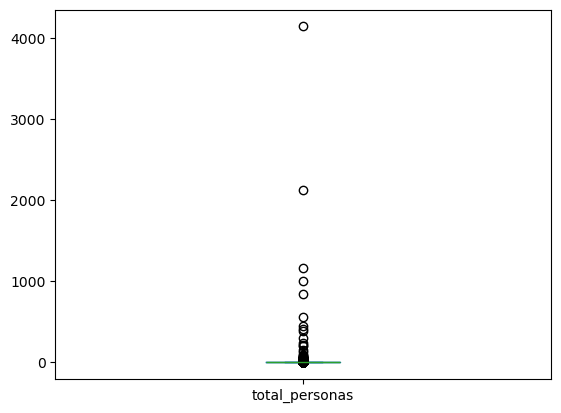

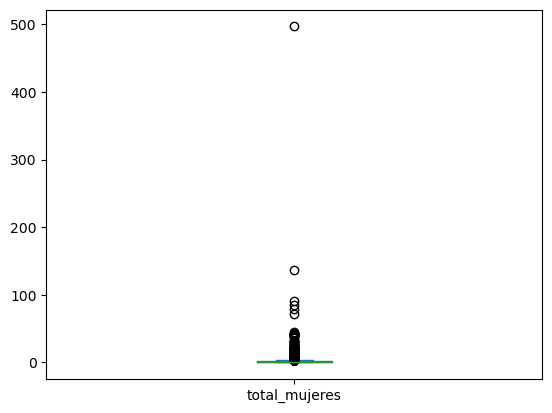

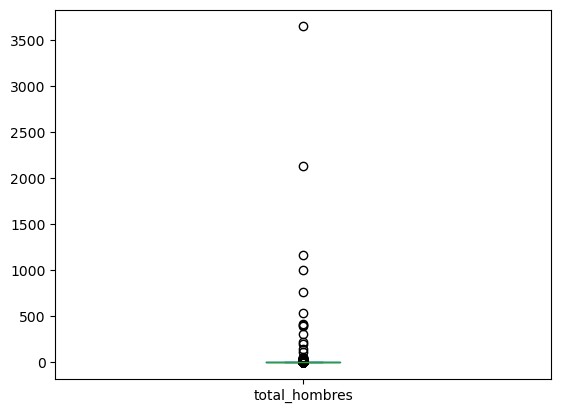

In [11]:
#Now we want to analyse the outliers in the household distribution 
df_hogar_renamed['total_personas'].plot(kind='box')
plt.show()

df_hogar_renamed['total_mujeres'].plot(kind='box')
plt.show()

df_hogar_renamed['total_hombres'].plot(kind='box')
plt.show()

Los outliers son muy altos, quizá esto indique que las viviendas son colectivas o de otro tipo no personal. 

Debido a que esta es la información de todas las provincias, agregadas, vamos a analizar lso mismos datos pero por provincia.

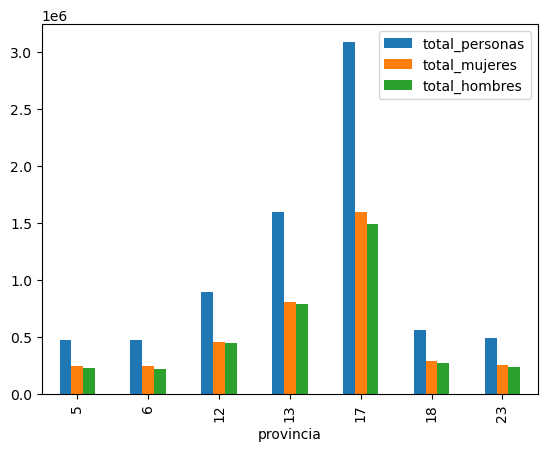

In [12]:
#We will analyze the distribution of total personas, mujeres y hombres por provincia. 
personas_por_provincia = df_hogar_renamed.groupby('provincia', as_index=False)[['total_personas', 'total_mujeres', 'total_hombres']].sum()
personas_por_provincia.plot(kind='bar', x='provincia', y=['total_personas', 'total_mujeres', 'total_hombres'])
plt.show()

Vemos que la provincia más poblada es la de Pichincha, seguida por la de Manabí. 

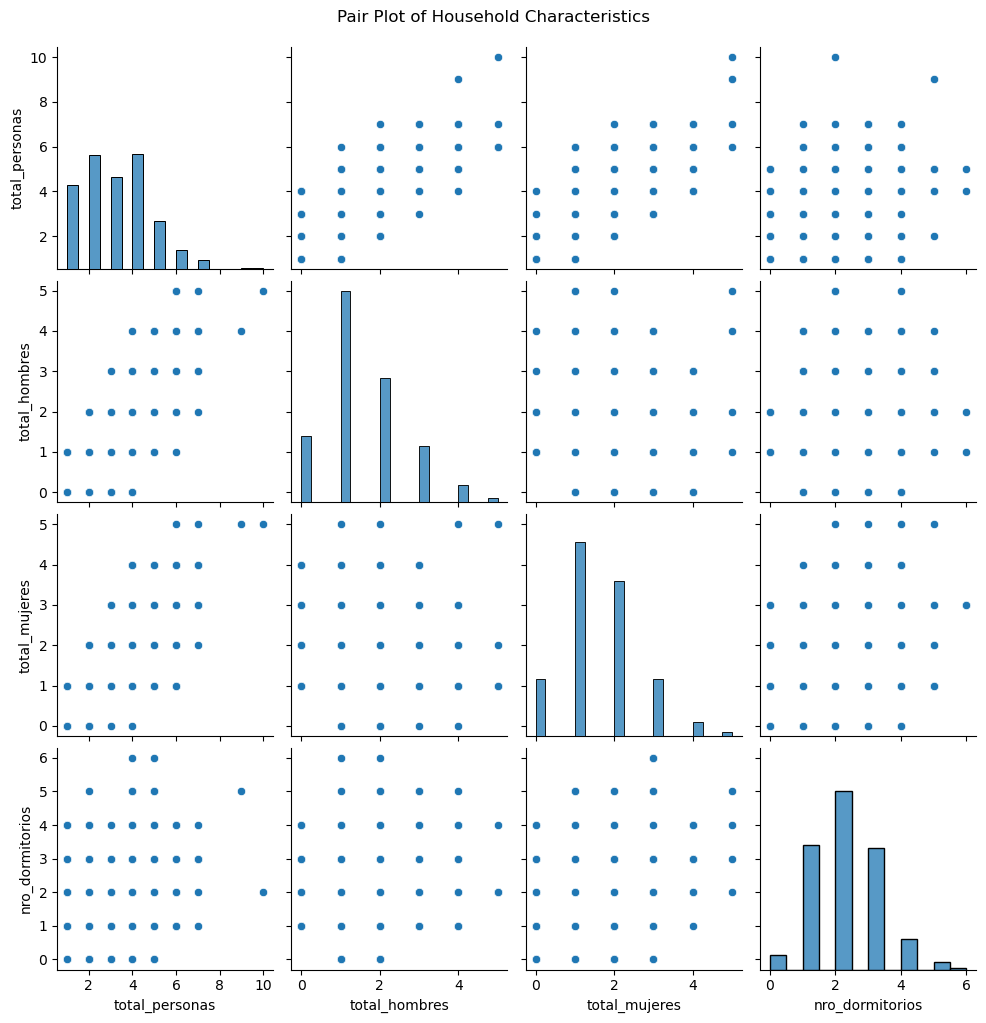

In [13]:
df_subset = df_hogar_renamed[['total_personas', 'total_hombres', 'total_mujeres', 'nro_dormitorios']].dropna()
sns.pairplot(df_subset.sample(500, random_state=42))
plt.suptitle('Pair Plot of Household Characteristics', y=1.02)
plt.show()


In [14]:
conn = sqlite3.connect('/Users/dicordova/Proyecto-FDS/data/nueva_base.db')

df_hogar_renamed.to_sql('df_renamed_hogar', conn, if_exists='replace', index=False)

conn.close()


Análisis de vulnerabilidad en términos de infraestructrura e indicadores económicos.